In [179]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ply
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [180]:
from sklearn import datasets

iris = datasets.load_iris()
type(iris)

sklearn.utils.Bunch

In [181]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [182]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [183]:
df['species'] = iris.target  
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [184]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [185]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [186]:
# 테스트 데이터

x = df.drop(['species'], axis=1)
y = df['species']

In [187]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, shuffle = True, stratify = y, random_state = 2022)

In [188]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
y_train = y_train.values

In [189]:
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_train_o
# 다중분류를 하면 레이블의 값을 원핫인코딩(0,1)으로 인코딩하여 값을 계산한다.

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1

In [190]:
y_train.shape

(120,)

In [191]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(4, )),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation = 'softmax'), # 마지막 분류를 할때 개수는 출력의 개수로 정한다. 출력의 값은 확률값으로 나온다.
])

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', # 2진분류일때는 binary, 다중분류일때는 categorical
    metrics = ['acc']
)

In [192]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 64)                320       
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 3)                 99        
                                                                 
Total params: 2,499
Trainable params: 2,499
Non-trainable params: 0
_________________________________________________________________


In [193]:
EPOCHS = 200
BATCH_SIZE = 32

history = model.fit(x_train, y_train_o,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_split = 0.2,
                    verbose = 1)

Epoch 1/200
3/3 [==============================] - 0s 73ms/step - loss: 1.1214 - acc: 0.3229 - val_loss: 1.0121 - val_acc: 0.5417
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 1.0435 - acc: 0.5312 - val_loss: 0.9391 - val_acc: 0.7500
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.9729 - acc: 0.6250 - val_loss: 0.8715 - val_acc: 0.7500
Epoch 4/200
3/3 [==============================] - 0s 12ms/step - loss: 0.9076 - acc: 0.6458 - val_loss: 0.8115 - val_acc: 0.7500
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.8533 - acc: 0.6458 - val_loss: 0.7595 - val_acc: 0.7500
Epoch 6/200
3/3 [==============================] - 0s 13ms/step - loss: 0.8039 - acc: 0.6458 - val_loss: 0.7138 - val_acc: 0.7500
Epoch 7/200
3/3 [==============================] - 0s 12ms/step - loss: 0.7615 - acc: 0.6458 - val_loss: 0.6719 - val_acc: 0.7500
Epoch 8/200
3/3 [==============================] - 0s 12ms/step - loss: 0.7239 - acc: 0.64

In [194]:
import matplotlib.pyplot as plt


# 학습곡선

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Acc')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Acc')

    plt.legend()
    plt.show()

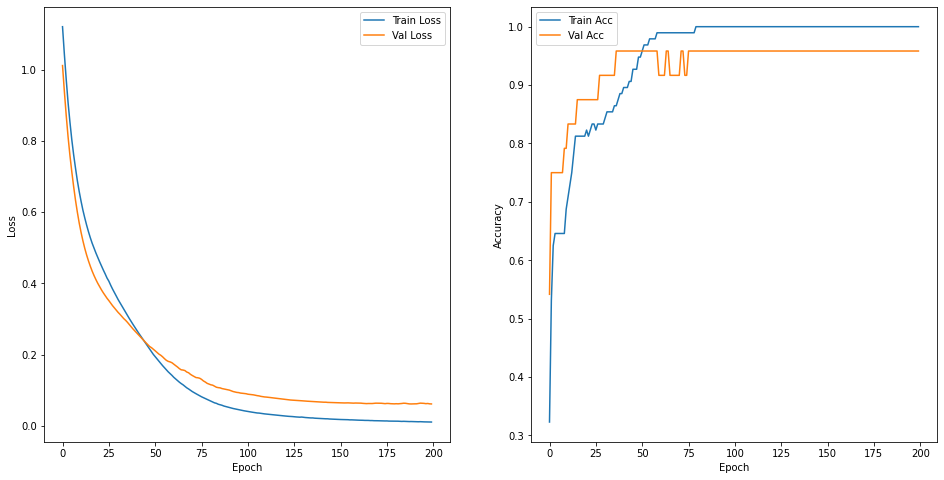

In [195]:
plot_history(history)

In [196]:
# 평가

model.evaluate(x_train, y_train_o)

4/4 [==============================] - 0s 2ms/step - loss: 0.0204 - acc: 0.9917


[0.02038360945880413, 0.9916666746139526]

In [197]:
x_test_s = scaler.transform(x_test)
y_test_oh = to_categorical(y_test)

In [198]:
model.evaluate(x_test_s, y_test_oh)

1/1 [==============================] - 0s 19ms/step - loss: 0.1867 - acc: 0.9333


[0.18669351935386658, 0.9333333373069763]

In [199]:
# 예측

y_pred = model.predict(x_test_s)
y_pred

1/1 [==============================] - 0s 47ms/step


array([[4.5400256e-08, 1.0320292e-05, 9.9998963e-01],
       [9.9995160e-01, 4.8440528e-05, 2.5654842e-08],
       [4.3043806e-04, 3.5100505e-01, 6.4856452e-01],
       [4.8729128e-04, 9.9466175e-01, 4.8509887e-03],
       [9.9988091e-01, 1.1911782e-04, 2.2655305e-08],
       [9.9996865e-01, 3.1378146e-05, 1.4072044e-08],
       [1.5716042e-04, 1.8905761e-02, 9.8093706e-01],
       [9.9983931e-01, 1.6066374e-04, 1.7944302e-08],
       [6.8137917e-05, 2.1726154e-02, 9.7820574e-01],
       [9.9899107e-01, 1.0086190e-03, 3.1171075e-07],
       [9.6852691e-06, 1.7373435e-02, 9.8261684e-01],
       [9.9998224e-01, 1.7736958e-05, 3.2136662e-09],
       [1.5418399e-06, 1.6259393e-04, 9.9983585e-01],
       [8.9858410e-08, 9.1234011e-05, 9.9990869e-01],
       [1.1780736e-09, 1.9039384e-06, 9.9999809e-01],
       [2.1771739e-04, 9.9901366e-01, 7.6862879e-04],
       [1.0468223e-03, 9.9678135e-01, 2.1717800e-03],
       [2.1175630e-08, 9.8440057e-07, 9.9999905e-01],
       [9.9993980e-01, 6.021

In [200]:
# y_pred = np.argmax(y_pred, axis=1) # np.argmax는 리스트에서 제일 큰 값의 인덱스값을 불러오는 함수이다. np.argmax(데이터값, 축)

In [201]:
y_pred = (y_pred > 0.5).astype('int')

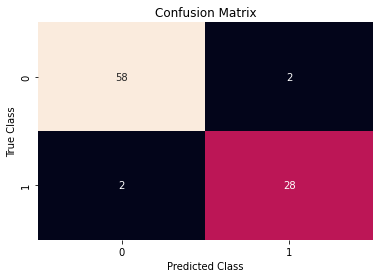

In [202]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred):
    cfm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cfm, annot = True, cbar = False)
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_test_oh.flatten(), y_pred.flatten())